# **Modeling Car Insurance Claim Outcomes**

## **The Dataset**

| Column              | Description                                                                                                 |
|---------------------|-------------------------------------------------------------------------------------------------------------|
| `id`                | Unique client identifier                                                                                    |
| `age`               | Client's age:                                                                                               |
|                     | - `0`: 16-25<br>- `1`: 26-39<br>- `2`: 40-64<br>- `3`: 65+                                                   |
| `gender`            | Client's gender:                                                                                            |
|                     | - `0`: Female<br>- `1`: Male                                                                                |
| `driving_experience`| Years the client has been driving:                                                                          |
|                     | - `0`: 0-9<br>- `1`: 10-19<br>- `2`: 20-29<br>- `3`: 30+                                                     |
| `education`         | Client's level of education:                                                                                |
|                     | - `0`: No education<br>- `1`: High school<br>- `2`: University                                              |
| `income`            | Client's income level:                                                                                      |
|                     | - `0`: Poverty<br>- `1`: Working class<br>- `2`: Middle class<br>- `3`: Upper class                         |
| `credit_score`      | Client's credit score (between zero and one)                                                                |
| `vehicle_ownership` | Client's vehicle ownership status:                                                                          |
|                     | - `0`: Does not own their vehicle (paying off finance)<br>- `1`: Owns their vehicle                          |
| `vehicle_year`      | Year of vehicle registration:                                                                               |
|                     | - `0`: Before 2015<br>- `1`: 2015 or later                                                                 |
| `married`           | Client's marital status:                                                                                    |
|                     | - `0`: Not married<br>- `1`: Married                                                                        |
| `children`          | Client's number of children                                                                                 |
| `postal_code`       | Client's postal code                                                                                        |
| `annual_mileage`    | Number of miles driven by the client each year                                                              |
| `vehicle_type`      | Type of car:                                                                                                |
|                     | - `0`: Sedan<br>- `1`: Sports car                                                                           |
| `speeding_violations`| Total number of speeding violations received by the client                                                |
| `duis`              | Number of times the client has been caught driving under the influence of alcohol                           |
| `past_accidents`    | Total number of previous accidents the client has been involved in                                          |
| `outcome`           | Whether the client made a claim on their car insurance (response variable):                                 |
|                     | - `0`: No claim<br>- `1`: Made a claim                                                                      |


**URL to DataSet**

In [ ]:
url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/14_Modeling%20Car%20Insurance%20Claim%20Outcomes/car_insurance.csv"

# **EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# Read the CSV file into a DataFrame
df_eda = pd.read_csv(url)
df_eda.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# Get information about the DataFrame
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [ ]:
# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_eda.shape[0]}")
print(f"Number of columns: {df_eda.shape[1]}")

Number of rows: 10000
Number of columns: 18


In [ ]:
# Check for missing values
missing_values = df_eda.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_eda.columns:
    unique_labels = df_eda[col].nunique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'id': 10000
Number of unique labels in column 'age': 4
Number of unique labels in column 'gender': 2
Number of unique labels in column 'driving_experience': 4
Number of unique labels in column 'education': 3
Number of unique labels in column 'income': 4
Number of unique labels in column 'credit_score': 9018
Number of unique labels in column 'vehicle_ownership': 2
Number of unique labels in column 'vehicle_year': 2
Number of unique labels in column 'married': 2
Number of unique labels in column 'children': 2
Number of unique labels in column 'postal_code': 4
Number of unique labels in column 'annual_mileage': 21
Number of unique labels in column 'vehicle_type': 2
Number of unique labels in column 'speeding_violations': 21
Number of unique labels in column 'duis': 7
Number of unique labels in column 'past_accidents': 15
Number of unique labels in column 'outcome': 2


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_eda.columns:
    unique_labels = df_eda[col].unique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'id': [569520 750365 199901 ... 468409 903459 442696]
Number of unique labels in column 'age': [3 0 1 2]
Number of unique labels in column 'gender': [0 1]
Number of unique labels in column 'driving_experience': ['0-9y' '10-19y' '20-29y' '30y+']
Number of unique labels in column 'education': ['high school' 'none' 'university']
Number of unique labels in column 'income': ['upper class' 'poverty' 'working class' 'middle class']
Number of unique labels in column 'credit_score': [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
Number of unique labels in column 'vehicle_ownership': [1. 0.]
Number of unique labels in column 'vehicle_year': ['after 2015' 'before 2015']
Number of unique labels in column 'married': [0. 1.]
Number of unique labels in column 'children': [1. 0.]
Number of unique labels in column 'postal_code': [10238 32765 92101 21217]
Number of unique labels in column 'annual_mileage': [12000. 16000. 11000. 13000. 14000. 100

**Pre-Processing**

In [ ]:
from sklearn.impute import SimpleImputer

# Define the mappings for categorical columns
mappings = {
    'age': {0: '16-25', 1: '26-39', 2: '40-64', 3: '65+'},
    'gender': {0: 'Female', 1: 'Male'},
    'education': {'none': 'No_education'},
    'vehicle_ownership': {0: 'No', 1: 'Yes'},
    'married': {0: 'unmarried', 1: 'Married'},
    'children': {0: 'No', 1: 'Yes'},
    'vehicle_type': {0: 'Sedan', 1: 'Sports'}
}

# Replace values based on mappings
df_eda.replace(mappings, inplace=True)

# Convert categorical columns to categorical data type
cat_cols = ['age', 'gender', 'education', 'vehicle_ownership', 'married', 'children', 'vehicle_type']
df_eda[cat_cols] = df_eda[cat_cols].astype('category')

# Handling missing values in 'credit_score' and 'annual_mileage'
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median as well
df_eda['credit_score'] = imputer.fit_transform(df_eda[['credit_score']])
df_eda['annual_mileage'] = imputer.fit_transform(df_eda[['annual_mileage']])

# Final preprocessed and transformed data
preprocessed_data = df_eda

df_eda.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,Female,0-9y,high school,upper class,0.629027,Yes,after 2015,unmarried,Yes,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,Male,0-9y,No_education,poverty,0.357757,No,before 2015,unmarried,No,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,Female,0-9y,high school,working class,0.493146,Yes,before 2015,unmarried,No,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,Male,0-9y,university,working class,0.206013,Yes,before 2015,unmarried,Yes,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,Male,10-19y,No_education,working class,0.388366,Yes,before 2015,unmarried,No,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10000 non-null  int64   
 1   age                  10000 non-null  category
 2   gender               10000 non-null  category
 3   driving_experience   10000 non-null  object  
 4   education            10000 non-null  category
 5   income               10000 non-null  object  
 6   credit_score         10000 non-null  float64 
 7   vehicle_ownership    10000 non-null  category
 8   vehicle_year         10000 non-null  object  
 9   married              10000 non-null  category
 10  children             10000 non-null  category
 11  postal_code          10000 non-null  int64   
 12  annual_mileage       10000 non-null  float64 
 13  vehicle_type         10000 non-null  category
 14  speeding_violations  10000 non-null  int64   
 15  duis                

In [ ]:
# Check for missing values
missing_values = df_eda.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


In [ ]:
# Iterate through columns and print the number of unique labels
for col in df_eda.columns:
    unique_labels = df_eda[col].unique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'id': [569520 750365 199901 ... 468409 903459 442696]
Number of unique labels in column 'age': ['65+', '16-25', '26-39', '40-64']
Categories (4, object): ['16-25', '26-39', '40-64', '65+']
Number of unique labels in column 'gender': ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Number of unique labels in column 'driving_experience': ['0-9y' '10-19y' '20-29y' '30y+']
Number of unique labels in column 'education': ['high school', 'No_education', 'university']
Categories (3, object): ['No_education', 'high school', 'university']
Number of unique labels in column 'income': ['upper class' 'poverty' 'working class' 'middle class']
Number of unique labels in column 'credit_score': [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
Number of unique labels in column 'vehicle_ownership': ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Number of unique labels in column 'vehicle_year': ['after 2015' 'before 2015']
Number of

### **Counts of Categorical Features**

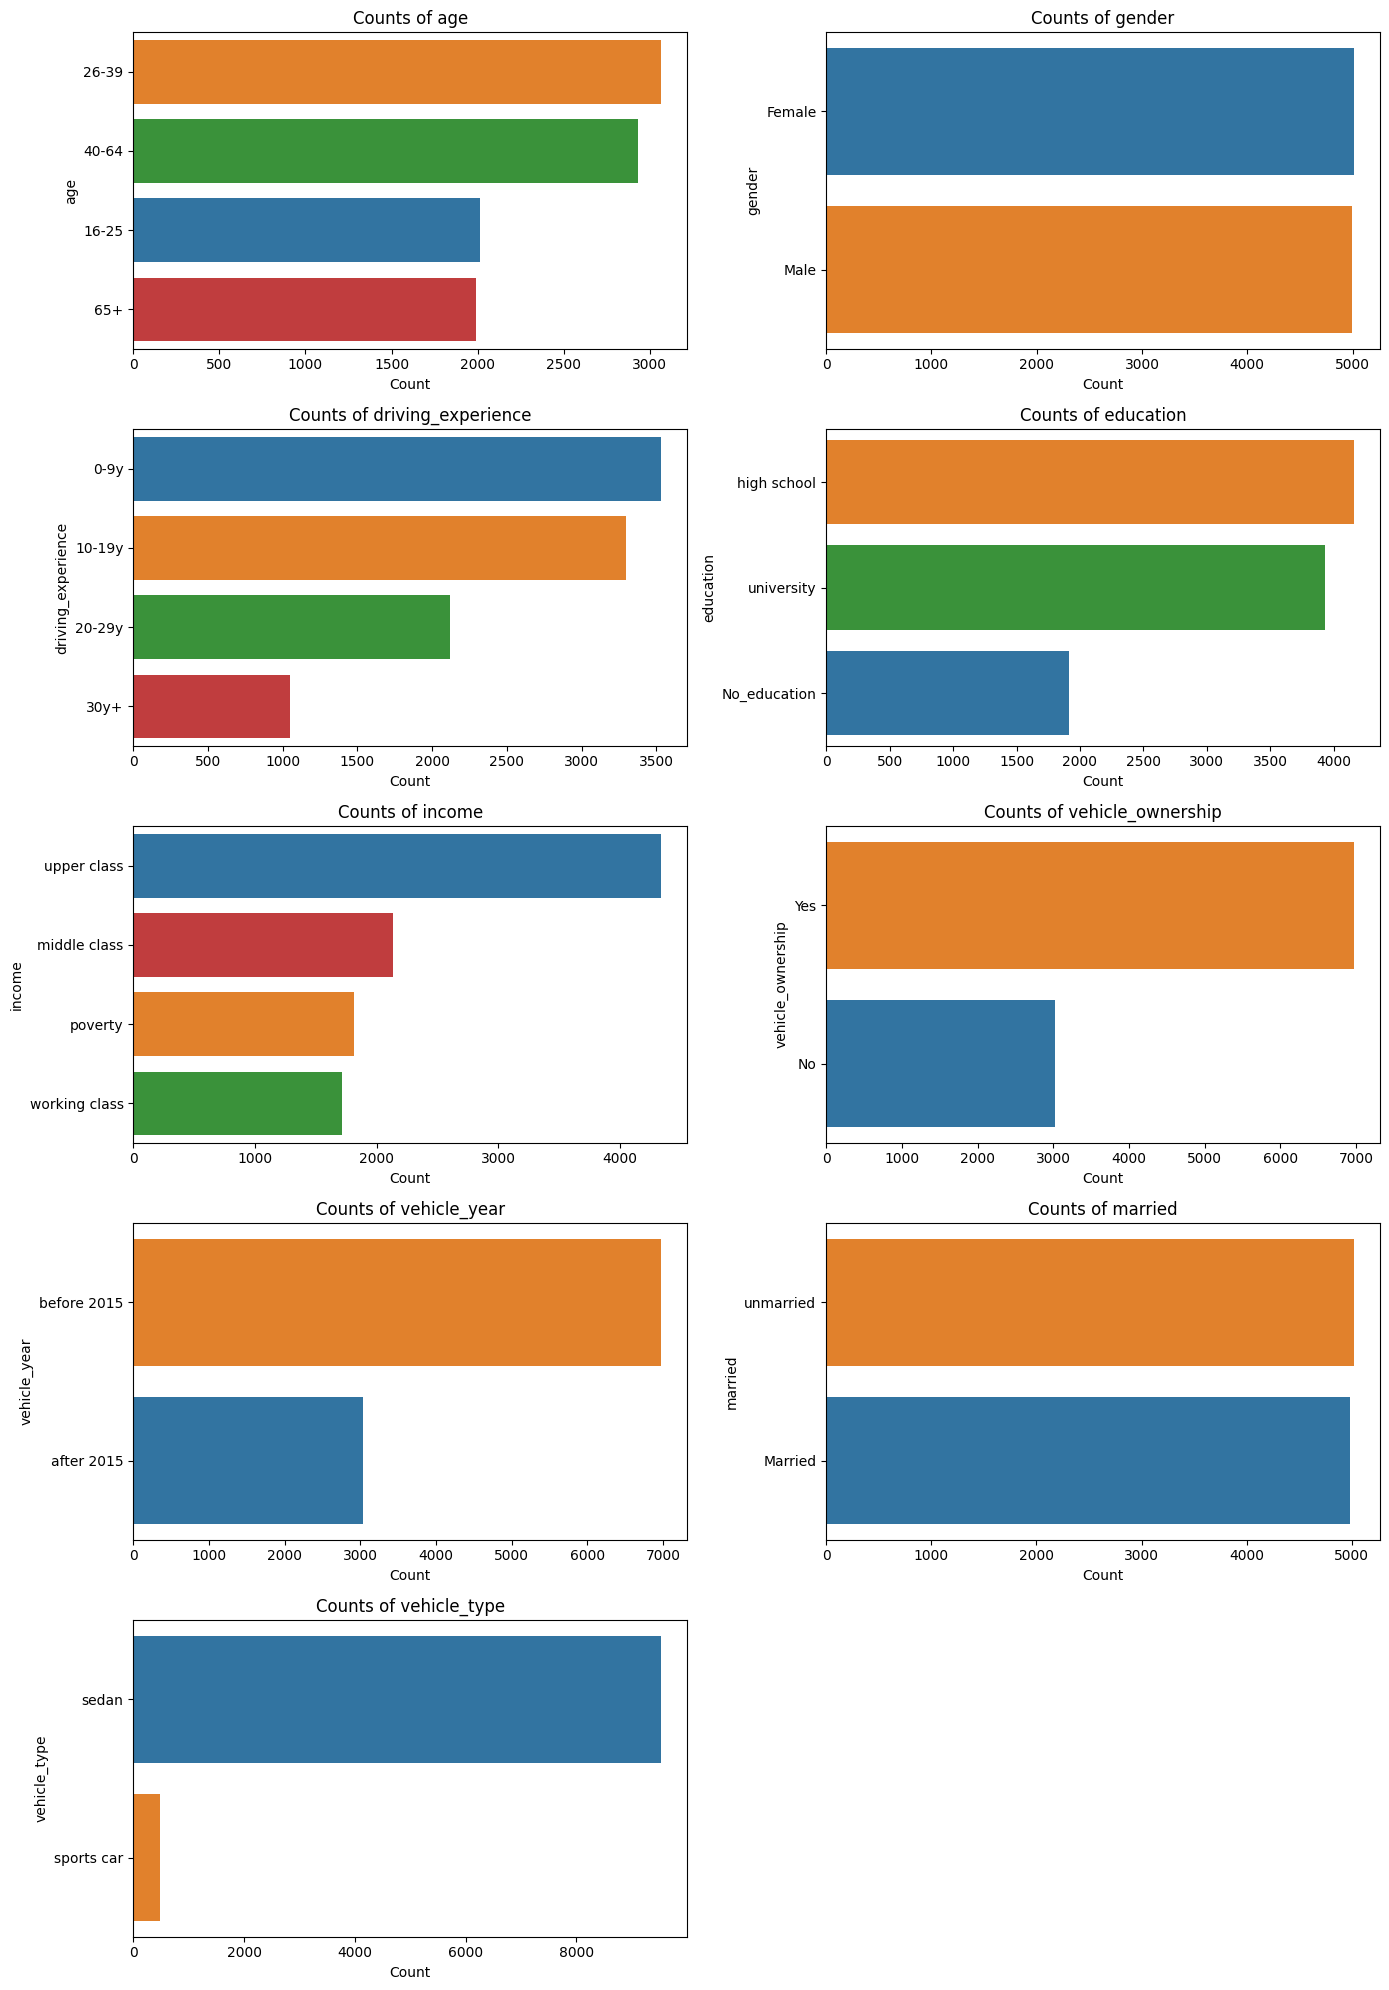

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_eda is already loaded

# List of categorical columns
categorical_columns = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_ownership', 'vehicle_year', 'married', 'vehicle_type']

# Plot count plots for categorical columns
plt.figure(figsize=(14, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index, hue=df_eda[col], palette="tab10", dodge=False, legend=False)
    plt.title(f'Counts of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()